# Inference Risk examples

In [1]:
import os
import sys

#Append to PYTHONPATH
path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(path)

from leakpro.synthetic_data_attacks.anonymeter.evaluators.inference_evaluator import InferenceEvaluator
from leakpro.synthetic_data_attacks.inference_utils import inference_risk_evaluation, load_inference_results
from leakpro.synthetic_data_attacks.plots import plot_ir_base_case, plot_ir_worst_case
from leakpro.tests.tests_synthetic_data_attacks.anonymeter_tests.fixtures import get_adult

#Get ori and syn
ori = get_adult(return_ori=True, n_samples=100)
syn = get_adult(return_ori=False, n_samples=100)

## Basic example

A very basic example requires an original (`ori`) and a synthetic (`syn`) pandas dataframes.

Afterwards, instantiate the evaluator and run `evaluate` and `print_results` methods.

**Note:** adjust `n_attacks` as needed, default value is `n_attacks=2_000`

In [2]:
evaluator = InferenceEvaluator(
    ori = ori,
    syn = syn,
    aux_cols = ["type_employer", "capital_loss", "hr_per_week", "age"],
    secret = "education",    
    n_attacks = 100
)
results = evaluator.evaluate()
results.print_results()

Success rate of main attack (and nr and total): 17.26%, 16, 100
Success rate of naive attack (and nr and total): 15.33%, 14, 100
Residual rate: 1.93%


# Inference risk evaluation 

## Worst case scenario

Perform a full inference risk evaluation in a worst case scenario, where each column acts as secret against rest of columns as auxiliary information. Requires an original (`ori`) and a synthetic (`syn`) pandas dataframes. In example, results are saved to `json` file to later plot them.

**Note:** adjust `n_attacks` as needed. Default values is: `n_attacks=2_000`

In [3]:
#Perform inference risk evaluation worst case scenario
inf_res = inference_risk_evaluation(
    dataset = 'adults',
    ori = ori,
    syn = syn,
    worst_case_flag = True,
    verbose = True,
    save_results_json = True,
    n_attacks = 100
)


Running inference_risk_evaluation_each_against_rest_columns for `adults`
Finished age on inference_risk_evaluation, progress: 7.14%
Finished type_employer on inference_risk_evaluation, progress: 14.29%
Finished education on inference_risk_evaluation, progress: 21.43%
Finished education_num on inference_risk_evaluation, progress: 28.57%
Finished marital on inference_risk_evaluation, progress: 35.71%
Finished occupation on inference_risk_evaluation, progress: 42.86%
Finished relationship on inference_risk_evaluation, progress: 50.0%
Finished race on inference_risk_evaluation, progress: 57.14%
Finished sex on inference_risk_evaluation, progress: 64.29%
Finished capital_gain on inference_risk_evaluation, progress: 71.43%
Finished capital_loss on inference_risk_evaluation, progress: 78.57%
Finished hr_per_week on inference_risk_evaluation, progress: 85.71%
Finished country on inference_risk_evaluation, progress: 92.86%
Finished income on inference_risk_evaluation, progress: 100.0%

### Res

In [4]:
#Get inference risk worst case results from json file
inf_res = load_inference_results(dataset="adults", worst_case_flag = True)

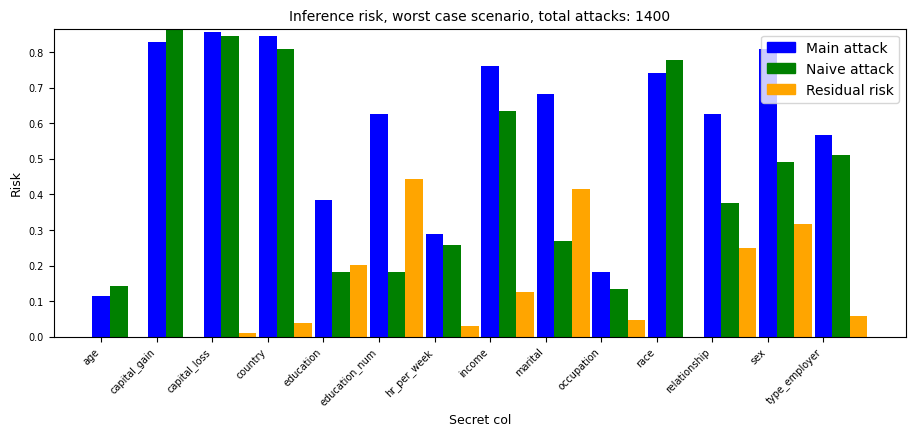

In [5]:
#Plot inference risk worst case results
plot_ir_worst_case(inf_res=inf_res, high_res_flag=False)

## Base case scenario

Perform a full inference risk evaluation in a base case scenario, where each column acts as secret against a where a sample of rest of columns is used as auxiliary information. Requires an original (`ori`) and a synthetic (`syn`) pandas dataframes. In example, results are saved to `json` file to later plot them.

**Note:** adjust `n_samples` and `n_attacks` as needed. Default values are: `n_samples=30, n_attacks=2_000`

In [6]:
#Perform inference risk evaluation base case scenario
inf_res = inference_risk_evaluation(
    dataset = 'adults',
    ori = ori,
    syn = syn,
    worst_case_flag = False,
    verbose = True,
    save_results_json = True,
    n_samples = 50,
    n_attacks = 100
)


Running inference_risk_evaluation_each_against_rest_columns for `adults`
inference_risk_evaluation progress: 1.37%
inference_risk_evaluation progress: 2.72%
inference_risk_evaluation progress: 4.08%
inference_risk_evaluation progress: 5.44%
inference_risk_evaluation progress: 6.79%
Finished age on inference_risk_evaluation, progress: 7.14%
inference_risk_evaluation progress: 8.51%
inference_risk_evaluation progress: 9.87%
inference_risk_evaluation progress: 11.22%
inference_risk_evaluation progress: 12.58%
inference_risk_evaluation progress: 13.93%
Finished type_employer on inference_risk_evaluation, progress: 14.29%
inference_risk_evaluation progress: 15.65%
inference_risk_evaluation progress: 17.01%
inference_risk_evaluation progress: 18.37%
inference_risk_evaluation progress: 19.72%
inference_risk_evaluation progress: 21.08%
Finished education on inference_risk_evaluation, progress: 21.43%
inference_risk_evaluation progress: 22.8%
inference_risk_evaluation progress: 24.15%
inferenc

In [7]:
#Get inference risk base case results from json file
inf_res = load_inference_results(dataset="adults", worst_case_flag = False)

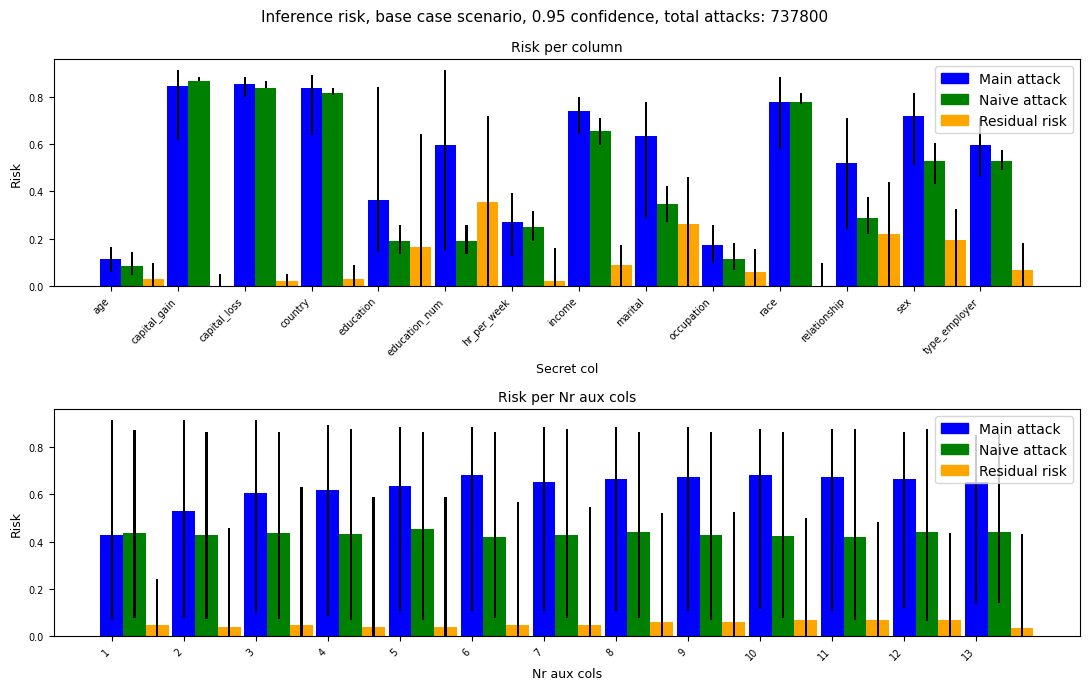

In [8]:
#Plot inference risk base case results
plot_ir_base_case(inf_res=inf_res, high_res_flag=False)